# Biomechanical analysis of vertical jumps

> Marcos Duarte  
> [Laboratory of Biomechanics and Motor Control](http://pesquisa.ufabc.edu.br/bmclab)  
> Federal University of ABC, Brazil

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-setup" data-toc-modified-id="Python-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python setup</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Center-of-gravity" data-toc-modified-id="Center-of-gravity-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Center of gravity</a></span><ul class="toc-item"><li><span><a href="#Measurement-of-the-jump-height-from-flight-time" data-toc-modified-id="Measurement-of-the-jump-height-from-flight-time-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Measurement of the jump height from flight time</a></span><ul class="toc-item"><li><span><a href="#Beware:-the-flight-time-you-measure-not-always-is-the-flight-time-you-want" data-toc-modified-id="Beware:-the-flight-time-you-measure-not-always-is-the-flight-time-you-want-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Beware: the flight time you measure not always is the flight time you want</a></span></li></ul></li><li><span><a href="#Measurement-of-the-jump-height-using-a-force-platform" data-toc-modified-id="Measurement-of-the-jump-height-using-a-force-platform-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Measurement of the jump height using a force platform</a></span></li><li><span><a href="#Force-platform" data-toc-modified-id="Force-platform-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Force platform</a></span><ul class="toc-item"><li><span><a href="#Ground-reaction-force-during-vertical-jump" data-toc-modified-id="Ground-reaction-force-during-vertical-jump-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Ground reaction force during vertical jump</a></span></li></ul></li><li><span><a href="#Jump-height-from-the-impulse-measurement" data-toc-modified-id="Jump-height-from-the-impulse-measurement-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Jump height from the impulse measurement</a></span></li><li><span><a href="#Kinetic-analysis-of-a-vertical-jump" data-toc-modified-id="Kinetic-analysis-of-a-vertical-jump-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Kinetic analysis of a vertical jump</a></span></li></ul></li><li><span><a href="#Further-reading" data-toc-modified-id="Further-reading-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Further reading</a></span></li><li><span><a href="#Video-lectures-on-the-internet" data-toc-modified-id="Video-lectures-on-the-internet-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Video lectures on the internet</a></span></li><li><span><a href="#Problems" data-toc-modified-id="Problems-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Problems</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Python setup

In [1]:
import numpy as np
from scipy.integrate import cumtrapz
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

## Introduction

A vertical jump is the act of raising (in the vertical direction) the body center of gravity using your own muscle forces and jumping into the air ([Wikipedia](https://en.wikipedia.org/wiki/Vertical_jump)).

Besides being an important element in several sports, the vertical jump can be used to train and evaluate some physical capacities (e.g., strength and power) of a person.

In this notebook we will study some aspects of the biomechanics of vertical jumps.

## Center of gravity

Center of gravity or center of mass is a measure of the average location in space of the body considering all body segments, their mass and their position.   
From Mechanics, the exact definitions of these quantities are:   

- **Center of mass (CM)**: The center of mass (or barycenter) is the unique point at the center of a distribution of mass in space that has the property that the weighted position vectors relative to this point sum to zero. SI unit: $m$ (vector).   
- **Center of gravity (CG)**: Center of gravity is the point in an object around which the resultant torque due to gravity forces vanishes. Near the surface of the earth, where the gravity acts downward as a parallel force field, the center of gravity and the center of mass are the same. SI unit: $m$ (vector).

The mathematical definition for the center of mass or center of gravity of a system with N objects (or particles), each with mass $m_i$ and position $r_i$ is:

\begin{equation}
\begin{array}{l l} 
\vec{r}_{cm} = \dfrac{1}{M}\sum_{i=1}^N m_{i}\vec{r}_i \quad\quad \text{where} \quad M = \sum_{i=1}^N m_{i} \\
\vec{r}_{cg} = \dfrac{1}{Mg}\sum_{i=1}^N m_{i}g_{i}\vec{r}_i \quad \text{where} \quad Mg = \sum_{i=1}^N m_{i}g_{i}
\end{array}
\label{}
\end{equation}

If we consider $g$ constant:

\begin{equation}
\begin{array}{l l} 
\vec{r}_{cg} = \dfrac{g}{Mg}\sum_{i=1}^N m_{i} \: \vec{r}_i = \dfrac{1}{M}\sum_{i=1}^N m_{i}\:\vec{r}_i \\
\\
\vec{r}_{cg} = \vec{r}_{cm}
\end{array}
\label{}
\end{equation}

This means that how much a person jumps is measured by the displacement of his or her center of gravity, and not by how much the feet was raised in space. For instance, the following Youtube video entitled "Highest Vertical jump 62 inches" (157.5 cm!) shows a great vertical jump, but in fact its height is 'just' about half of that:

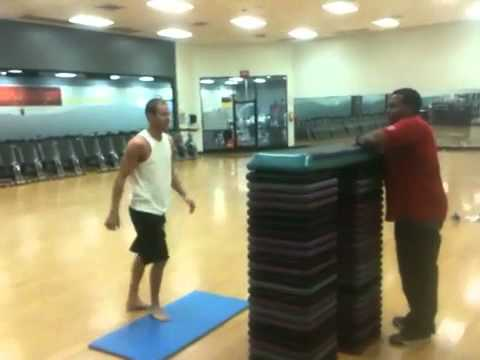

In [2]:
YouTubeVideo('NUyql5IFTNY')

So, the true measurement of the height of a vertical jump is the displacement of the center of gravity in the vertical direction. A problem is that to measure the center of gravity position is usually too complicated because we would have to estimate the position of each body segment.    
Instead, there are alternative methods with varying degrees of accuracy for measuring the height of vertical jump ([see here for a list](http://www.topendsports.com/testing/equipment-verticaljump.htm)):   

 - [**Sargent Jump Test**](http://www.brianmac.co.uk/sgtjump.htm). How high you can reach an object.   
 - **Flight time measurement**. From Newton's laws of motion, the height of a jump is related to the flight time under controlled conditions. One can measure the flight time using a [contact mat](http://www.probotics.org/JustJump/verticalJump.htm), light sensor, [accelerometer](http://www.jssm.org/vol11/n1/17/v11n1-17pdf.pdf), video (the number of frames the jumper is in the air), attaching a cable to the jumper's waist and measuring the displacement of this cable, etc.      
 - **Force platform measurements**. A device called [force platform](https://en.wikipedia.org/wiki/Force_platform) which measures the forces applied on the ground as a function of time can also be used to measure the flight time and then the height of vertical jump. But the real utility of the force platform is that it can actually measure the force produced by the jumper to find the displacement of the center of gravity using Newton's laws of motion.   

### Measurement of the jump height from flight time

We can estimate the height of a jump measuring for how long the jumper stayed in the air during the jump (flight time). At the vertical direction and ignoring the air resistance, the only external force that acts on the body in the air is the (constant) gravitational force, with magnitude $P = -mg$, where $g$ is the acceleration of gravity (about $9.8 m/s^2$ on the surface of the Earth). Using the equation of motion for a body with constant acceleration, the height of the center of gravity of a body in the air at a certain time is:   

\begin{equation}
h(t) = h_0 + v_0 t - \frac{gt^2}{2}
\label{}
\end{equation}

At the maximum height ($h$, the jump height), the vertical velocity of the body is zero. We can take use this property to calculate the jump height from the time of falling:

\begin{equation}
h = \frac{gt_{fall}^2}{2}
\label{}
\end{equation}

Because the time of falling is equal to the time of rising, $t_{flight} = t_{rise} + t_{fall} = 2 t_{fall}$, the jump height as a function of the flight time is:

\begin{equation}
h = \frac{gt_{\text{flight}}^2}{8}
\label{}
\end{equation}

This simple equation is the principle of measurement of the jump height any an instrument that measures the time the feet is not in contact with ground (using a pressure mat or a photocell sensor).  
There are (were) even shoes using this principle of measurement:

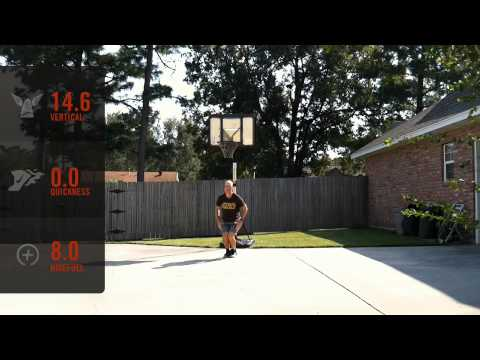

In [3]:
YouTubeVideo('QXnQ4ENjTuY')

#### Beware: the flight time you measure not always is the flight time you want

However, the flight time, measured as the time without contact with the ground, during a jump is not necessarily equal to the flight time of the body center of gravity (which is the measure we need to estimate the actual height jump).  

For example, if the jumper flexes knees and hips at the landing phase, the measured flight time will be larger but not the flight time of the body center of gravity. Because that, a more accurate method is to use a force platform as we will see now.

### Measurement of the jump height using a force platform

Let's draw the [free body diagram](https://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/FreeBodyDiagram.ipynb) for a person performing a jump:

<div class='center-align'><figure><img src="./../images/FBDjump.png" alt="Vertical jump FBD"/><figcaption><center><i>A person during the propulsion phase of jumping and the corresponding free body diagram drawn for the center of mass. GRF(t) is the time-varying ground reaction force.</i></center></figcaption></figure></div>

So, according to the Euler's version of the Newton's second law (for the motion of the body center of mass), the dynamics (as a function of time) for the body center of mass during a jump is given by:

\begin{equation}
GRF(t) - mg = ma(t)
\label{}
\end{equation}

Where $GRF(t)$ is the ground reaction force applied by the ground on the jumper, $m$ is the subject mass, and $a(t)$ the center of mass acceleration.

### Force platform  

Force platform or force plate is an instrument for measuring the forces generated by a body acting on the platform. A force plate is an electromechanical transducer that measures force typically by measuring the deformation (strain) on its sensors and converting that to electrical signals. These electrical signals are converted back to force and moment of force using calibration factors. 

<div class='center-align'><figure><img src="./../images/KistlerForcePlate.png" alt="A force plate and its coordinate system convention"/><figcaption><center><i>Figure. A force plate and its coordinate system convention (from <a href="http://isbweb.org/software/movanal/vaughan/kistler.pdf">Kistler Force Plate Formulae</a>).</i></center></figcaption></figure></div>

Usually the force platform is placed on the floor and we are interested not in the force applied on the force platform, but in its reaction, the force that the force platform applied on the jumper, which, according to Newton's third law of motion, has the same magnitude and line of action but opposite direction. Because of that, usually the forces measured by the force platform are referred as ground reaction forces. 

Most of the commercial force platforms are able to measure the vectors force, $[F_X,\, F_Y,\, F_Z]$, and moment of force, $[M_X,\, M_Y,\, M_Z]$, from which the [center of pressure](https://en.wikipedia.org/wiki/Center_of_pressure_(terrestrial_locomotion) (COP, the point of application of the resultant force on the force plate) can be calculated $[COP_X,\, COP_Y]$. Because of that, these force platforms are known as six-components. Force platforms that can measure only the vertical force component and two moments of force (or the two COPs) are known as three-components.

Read more about force platforms in chapter 5 or Winter's book and in Cross (1999). 

#### Ground reaction force during vertical jump

Here is a video from Youtube of a person jumping and a plot of the ground reaction force measured with a force platform:

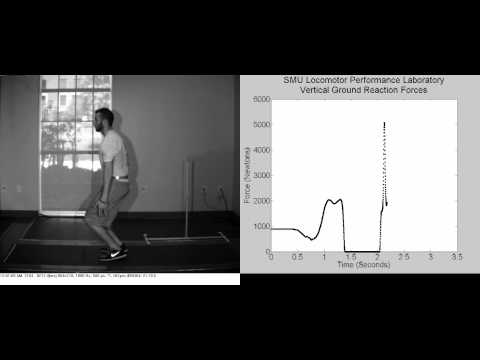

In [4]:
YouTubeVideo('qN3apht8zRs')

Here is a plot of the vertical component of the ground reaction force measured with a force platform during a vertical jump with countermovement:

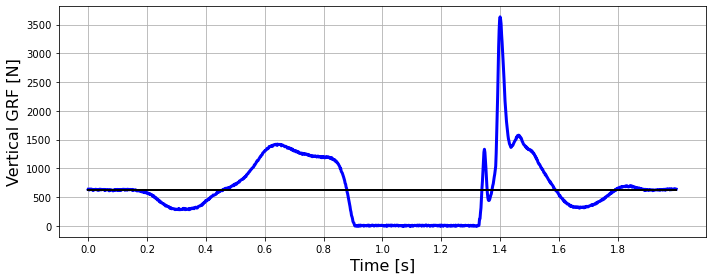

In [5]:
# load data file
GRFv = np.loadtxt('https://raw.githubusercontent.com/BMClab/BMC/master/data/GRFZjump.txt',
                  skiprows=0, unpack=False)
#GRFv = np.loadtxt('./../data/GRFZjump.txt', skiprows=0, unpack=False)

# sampling frequency (Hz)
freq = 600
time = np.arange(0, len(GRFv)/freq, 1/freq)
# gravitational acceleration, m/s2
g = 9.8
# subject's mass
m = np.mean(GRFv[0:int(freq/10)])/g
# plot GRF data
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(time, GRFv, 'b', linewidth='3')
# plot subject's weight
ax.plot([time[0], time[-1]], [m*g, m*g], 'k', linewidth='2')
ax.set_xlabel('Time [s]', fontsize=16)
ax.set_ylabel('Vertical GRF [N]', fontsize=16)
ax.set_xticks(np.arange(time[0], time[-1], .2))
ax.grid()
plt.tight_layout()
plt.show()

This graph of the vertical component of the ground reaction force shown above has very interesting things: 

 1. At the beginning the jumper was standing still and the GRF is equal to the jumper's body weight;  
 2. After the jumper started the movement to jump there is a phase where GRF is lower than the body weight even with the jumper completely on the ground;   
 3. The GRF increases to about two times the body weight while the jumper is still on the ground;   
 4. When the jumper is in the air is clearly indicated by the zero values of GRF;   
 5. After landing the GRF reaches a peak of about six times the jumper's body weight.  
 
These are all interesting things but we will discuss only some of them next.  
We can detect the takeoff and landing instants by detecting the first and last time GRF is under a certain threshold (close to zero):

In [6]:
# make sure GRFv has no offset
GRFv -= np.min(GRFv)

limiar = 10

inds = np.where(GRFv < limiar)
i1 = inds[0][0]
i2 = inds[0][-1]
print('Takeoff instant {:.3f} s'.format(time[i1]))
print('Landing instant {:.3f} s'.format(time[i2]))

Takeoff instant 0.907 s
Landing instant 1.323 s


The jump height can be calculated from these instants using the kinematic expression:

In [7]:
h = g*(time[i2]-time[i1])**2/8
print('Jump height {:.3f} m'.format(h))

Jump height 0.213 m


We can detect the beginning of movement by detecting when GRFv starts to go below the body weight:

In [8]:
inds = np.where(GRFv < 0.95*m*g)
i0 = inds[0][0]
print('Jump start {:.3f} s'.format(time[i0]))

Jump start 0.188 s


### Jump height from the impulse measurement

We know that the [mechanical impulse](http://nbviewer.ipython.org/github/BMClab/bmc/blob/master/notebooks/KineticsFundamentalConcepts.ipynb#Impulse) is equal to the change in linear momentum of a body, which for a body with constant mass is simply the body mass times the change in velocity. For a time-varying force, the impulse is:

\begin{equation}
\vec{Imp} = \int_{t_0}^{t_f} \vec{F}(t) \mathrm{d}t = m [\vec{v}_{t_f} - \vec{v}_{t_0}]
\label{}
\end{equation}

For the analysis of a vertical jump, in the vertical direction $F(t) = GRF(t) - mg$ and $F(t)$ is discrete in time (sampled at intervals $\Delta t$):

\begin{equation}
Imp = \sum_{t_0}^{t_f} F(t)\Delta t = m [v_{t_f} - v_{t_0}]
\label{}
\end{equation}

For a jump starting from a rest position, the initial velocity is zero. This means that the change in velocity is equal to the final velocity (at the moment of takeoff). Therefore, we can calculate the final velocity of the propulsion phase as:

\begin{equation}
\begin{array}{l l}
\sum_{t_0}^{t_f} F(t)\Delta t = m[v_f-0] \implies \\
v_f = \dfrac{\sum_{t_0}^{t_f} F(t)\Delta t}{m}
\end{array}
\label{}
\end{equation}

This final velocity is the initial velocity of the aerial phase of the jump.  
If we know the initial velocity of the jump, it's straightforward to calculate the jump height, for example, using the [Torricelli's equation](http://en.wikipedia.org/wiki/Torricelli's_equation): 

\begin{equation}
v_f^2 = v_0^2 - 2gh
\label{}
\end{equation}

Where $v_i$ and $v_f$ are the initial and final velocities and $h$ is the change in the position of the body center of gravity (the height of the vertical jump) and we considered just the first part of the jump, the upward phase.

From Mechanics we know that the velocities at takeoff and at landing are equal in magnitude and that the time of the upward phase is equal to the time of the downward phase of this ballistic flight.

For the upward phase of the vertical jump:

\begin{equation}
\begin{array}{l l} 
0 = v_0^2 - 2gh \implies \\
h = \dfrac{v_0^2}{2g}
\end{array}
\label{}
\end{equation}

We could also have calculated the jump height from the velocity using the [principle of conservation of the mechanical energy](https://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/KineticsFundamentalConcepts.ipynb#Principles-of-conservation). The sum of the potential and kinetic energies at the instants beginning of the jump ($t_0$) and highest point of the jump trajectory ($t_{hmax}$) are equal:

\begin{equation}
mgh(t_0) + \frac{mv^2(t_0)}{2} = mgh(t_{hmax}) + \frac{mv^2(t_{hmax})}{2}
\label{}
\end{equation}

\begin{equation}
0 + \frac{mv^2(t_0)}{2} =  mgh(t_{hmax}) + 0
\label{}
\end{equation}

\begin{equation}
h(t_{hmax}) = \frac{v^2(t_0)}{2g}
\label{}
\end{equation}

Same expression as before.   

### Kinetic analysis of a vertical jump

The force plate can also be used to calculate other mechanical variables to characterize the subject's performance (see Dowling and Vamos 1993) for a list of such variables). For example, 

Resultant vertical force on the subject:

\begin{equation}
F(t) = GRF(t) - mg
\label{}
\end{equation}

Vertical acceleration of the center of mass:

\begin{equation}
a(t) = \frac{F(t)}{m}
\label{}
\end{equation}

Vertical velocity of the center of mass (initial velocity equals zero):

\begin{equation}
v(t) = \sum_{t_0}^{t_f} a(t) \Delta t
\label{}
\end{equation}

Vertical displacement of the center of mass (initial displacement equals zero):

\begin{equation}
h(t) = \sum_{t_0}^{t_f} v(t) \Delta t
\label{}
\end{equation}

Power due to the resultant vertical force:

\begin{equation}
P(t) = GRF(t)v(t)
\label{}
\end{equation}

Note that we used the vertical ground reaction force for the calculation of mechanical power, not the resultant force on the body, to represent the total power the jumper is producing. One could argue that during standing the jumper is not actually 'generating' any force (so we should not use GRF), but in this phase, the jumper's speed is zero, and the power is zero.

Let's work with the ground reaction force data from a vertical jump and calculate such quantities.  
For now, let's ignore the landing and focus on the propulsion phase of the jump.

In [9]:
time = time[i0:i1+1] - time[i0]
# resultant vertical force
F = GRFv[i0:i1+1] - m*g
# vertical acceleration of the center of mass
a = F/m
# vertical velocity of the center of mass
v = cumtrapz(a, dx=1/freq, initial=0)
# vertical displacement of the center of mass
h = cumtrapz(v, dx=1/freq, initial=0)
# power due to the resultant vertical force
P = (F+m*g)*v

And here are the plots for these quantities:

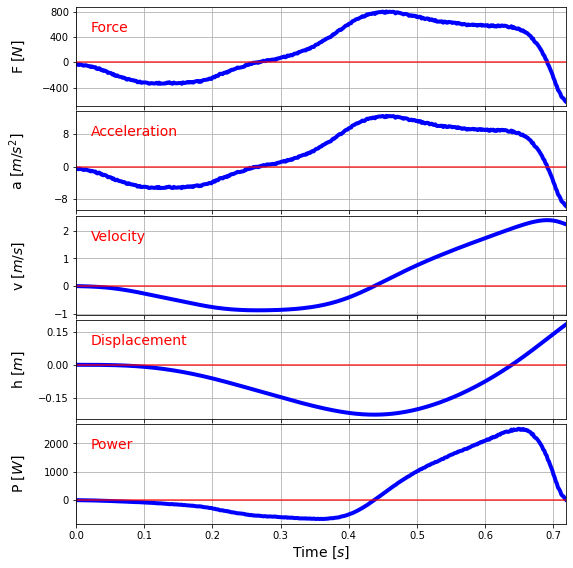

In [10]:
fig, axs = plt.subplots(5, 1, sharex=True, squeeze=True, figsize=(8, 8))
axs[0].plot(time, F, 'b', lw='4', label='Force')
axs[1].plot(time, a, 'b', lw='4', label='Acceleration')
axs[2].plot(time, v, 'b', lw='4', label='Velocity')
axs[3].plot(time, h, 'b', lw='4', label='Displacement')
axs[4].plot(time, P, 'b', lw='4', label='Power')
axs[4].set_xlabel('Time [$s$]', fontsize=14)
axs[4].set_xticks(np.arange(time[0], time[-1], .1))
axs[4].set_xlim([time[0], time[-1]])
ylabel = ['F [$N$]', 'a [$m/s^2$]', 'v [$m/s$]', 'h [$m$]', 'P [$W$]']
for (axi, ylabeli) in zip(axs, ylabel):
    axi.axhline(0, c='r', linewidth='2', alpha=.6)
    axi.set_ylabel(ylabeli, fontsize=14)
    axi.text(.03, .75, axi.get_legend_handles_labels()[1][0],
             transform=axi.transAxes, fontsize=14, c='r')
    axi.yaxis.set_major_locator(plt.MaxNLocator(4))
    axi.yaxis.set_label_coords(-.1, 0.5)
    axi.grid(True)
plt.tight_layout(h_pad=0)
plt.show()

Looking at these graphs, we can see that the instant where the jumper has the lowest position is approximately at 0.44 s, where the velocity is also zero. Up to this instant the jumper was moving down (countermovement phase) and from this instant on the jumper starts to rise until loses contact with the ground. This instant also indicates when the power starts to be positive. Looking at the graph of the force, the total area under the curve (the impulse) up to this instant should be zero because if the jumper started at rest and came to zero velocity again, the impulse is zero.  

This turning point is used to indicate the change from eccentric (negative power) to concentric (positive power) phase of the jump. Although this instant was detected based on the movement of the center of mass, this roughly indicates the change in the net muscle activation in the body to perform the jump.

Let's visualize these phases in the plots:

In [11]:
inds = np.where(v > 0)
iec = inds[0][0]
print('Instant of the lowest position {:.3f} s'.format(time[iec]))

Instant of the lowest position 0.438 s


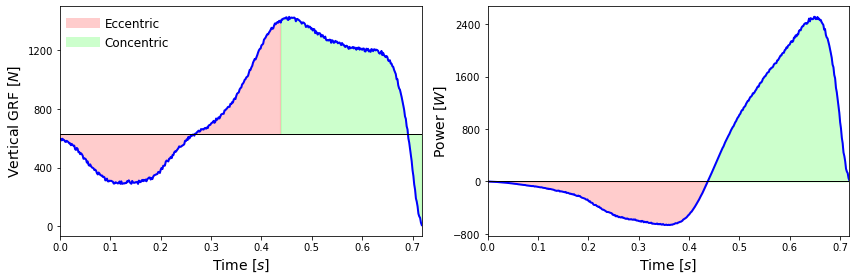

In [12]:
fig, axs = plt.subplots(1, 2, sharex=True, squeeze=True, figsize=(12, 4))
axs[0].plot(time, F+m*g, 'b', linewidth='2')
axs[0].plot([time[0], time[-1]], [m*g, m*g], 'k', linewidth='1')
axs[0].fill_between(time[0:iec], F[0:iec]+m*g, m*g, color=[1, 0, 0, .2])
axs[0].fill_between(time[iec:-1], F[iec:-1]+m*g, m*g, color=[0, 1, 0, .2])
axs[0].plot([], [], linewidth=10, color=[1, 0, 0, .2], label='Eccentric')
axs[0].plot([], [], linewidth=10, color=[0, 1, 0, .2], label='Concentric')
axs[0].legend(frameon=False, loc='upper left', fontsize=12)
axs[0].set_ylabel('Vertical GRF [$N$]', fontsize=14)
axs[0].set_xlabel('Time [$s$]', fontsize=14)
axs[0].yaxis.set_major_locator(plt.MaxNLocator(5))
axs[1].plot(time, P, 'b', linewidth='2')
axs[1].plot([time[0], time[-1]], [0, 0], 'k', linewidth='1')
axs[1].fill_between(time[0:iec], P[0:iec], color=[1, 0, 0, .2])
axs[1].fill_between(time[iec:-1], P[iec:-1], color=[0, 1, 0, .2])
axs[1].set_ylabel('Power [$W$]', fontsize=14)
axs[1].set_xlabel('Time [$s$]', fontsize=14)
axs[1].set_xticks(np.arange(time[0], time[-1], .1))
axs[1].yaxis.set_major_locator(plt.MaxNLocator(5))
axs[1].set_xlim([time[0], time[-1]])
plt.tight_layout()
plt.show()

## Further reading

- [The Physics of Nike+ Hyperdunk](https://www.wired.com/2012/09/the-physics-of-nike-hyperdunk-2/)  
- Linthorne NP (2001) <a href="http://www.brunel.ac.uk/~spstnpl/Publications/VerticalJump(Linthorne).pdf" target="_blank">Analysis of standing vertical jumps using a force platform</a>. American Journal of Physics, 69, 1198-1204. 

## Video lectures on the internet

- [Physics breakdown of a jump](https://youtu.be/ZaGreqCFOJM)  
- [Recap of the force plate analysis](https://youtu.be/u05pLtC-T1s)  

## Problems

1. The mechanical work ($W$) by the vertical force is defined as:  
$$ W = \int_{h_0}^{h_f} F(h) \mathrm{d}h $$  
Which can also be calculated as the variation in the kinetic energy or the integral of mechanical power:  
$$ W = \Delta E_K = \int_{t_0}^{t_f} P(t) \mathrm{d}t $$  
 a) Use the data of the vertical jump in this text to plot the graph for the ground reaction force versus displacement.  
 b) Calculate the mechanical work produced in the entire jump and in the eccentric and concentric phases using the two methods described above.  
  
2. For the dataset in this text, calculate all the variables described in Dowling, Vamos (1993).

## References

- Cross R (1999) [Standing, walking, running, and jumping on a force plate](https://pdfs.semanticscholar.org/1ad0/3557c2bc1ac8e02d89946a17eeadfb7d8a78.pdf). American Journal of Physics, 67, 4, 304-309.  
- Dowling JJ, Vamos L (1993) [Identification of Kinetic and Temporal Factors Related to Vertical Jump Performance](./../refs/Dowling93JABvert_jump.pdf). Journal of Applied Biomechanics, 9, 95-110.   
- Linthorne NP (2001) <a href="http://www.brunel.ac.uk/~spstnpl/Publications/VerticalJump(Linthorne).pdf" target="_blank">Analysis of standing vertical jumps using a force platform</a>. American Journal of Physics, 69, 1198-1204.  
- Winter DA (2009) [Kinetics: Forces and Moments of Force](https://elearning2.uniroma1.it/pluginfile.php/92521/mod_folder/content/0/Biomechanics%20and%20Motor%20Control%20of%20Human%20Movement%20-%20ch5.pdf). Chapter 5 of [Biomechanics and motor control of human movement](http://books.google.com.br/books?id=_bFHL08IWfwC). 4 ed. Hoboken, EUA: Wiley.